In [1]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [2]:
text = "해보지 않으면 해낼 수 없다."

In [3]:
text_to_word_sequence(text)

['해보지', '않으면', '해낼', '수', '없다']

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
doc = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
       '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.']

In [7]:
token = Tokenizer()

In [9]:
token.fit_on_texts(doc)

In [11]:
token

In [12]:
token.word_counts

OrderedDict([('먼저', 2),
             ('텍스트의', 4),
             ('각', 2),
             ('단어를', 2),
             ('나누어', 2),
             ('토큰화', 2),
             ('합니다', 2),
             ('단어로', 2),
             ('토큰화해야', 2),
             ('딥러닝에서', 4),
             ('인식됩니다', 2),
             ('토큰화한', 2),
             ('결과는', 2),
             ('사용할', 2),
             ('수', 2),
             ('있습니다', 2)])

In [13]:
token.word_docs

defaultdict(int,
            {'단어를': 2,
             '텍스트의': 4,
             '합니다': 2,
             '토큰화': 2,
             '먼저': 2,
             '각': 2,
             '나누어': 2,
             '인식됩니다': 2,
             '토큰화해야': 2,
             '단어로': 2,
             '딥러닝에서': 4,
             '결과는': 2,
             '사용할': 2,
             '수': 2,
             '토큰화한': 2,
             '있습니다': 2})

In [32]:
text = '오랫동안 꿈꾸는 이는 그 꿈을 닯아간다.'
token = Tokenizer()
token.fit_on_texts(text)

In [33]:
token.fit_on_texts([text])

In [34]:
token.word_index

{'꿈': 1,
 '는': 2,
 '그': 3,
 '오': 4,
 '랫': 5,
 '동': 6,
 '안': 7,
 '꾸': 8,
 '이': 9,
 '을': 10,
 '닯': 11,
 '아': 12,
 '간': 13,
 '다': 14,
 '오랫동안': 15,
 '꿈꾸는': 16,
 '이는': 17,
 '꿈을': 18,
 '닯아간다': 19}

In [71]:
from tensorflow.keras.utils import to_categorical

In [72]:
# to_categorical(x, num_classes=None)
#     Converts a class vector (integers) to binary class matrix.
    
# help(to_categorical)

In [73]:
token.texts_to_sequences([text])

[[]]

In [74]:
# 원핫인코딩 시 숫자배열로 만들어 놔야한다. 그 숫자 배열은 순서가 있는 토큰으로 만듬.
# 0을 추가해서 시작을 알린다.

In [75]:
# 그 만든 숫자 배열을 0과 1로만 이루어진 배열로 to_categorical을 통해 바꾸어야 한다.
# 이 때 주의할 점은 배열 맨 앞에 0이 추가(시작, start of sentences, SOS) 되어야 하므로,
# 단어수 보다 1이 더 많아야 한다.

In [76]:
word_size = len(token.word_index) +1

In [77]:
x = token.texts_to_sequences([text])

In [78]:
to_categorical(x, num_classes=word_size)

array([], shape=(1, 0, 21), dtype=float64)

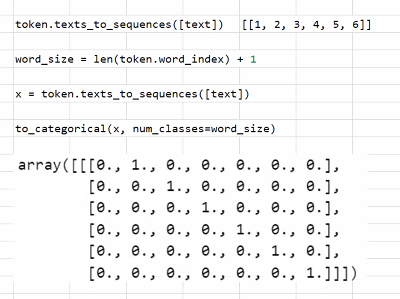

In [79]:
# 원핫 인코딩을 사용했을 경우 벡터의 길이가 너무 길어진다는 단점이 있다.
# 예를 들어, 1만개의 단어 토큰으로 이루어진 말뭉치(Corpus)를 
# 다룬 다 했을 경우, 벡터화 해버리면???
# 이것은 희소벡터가 된다. 9,999개의 0과 1로 이루어진 희소행렬이 된다.

# 이러한 공간적 낭비 해결 -----> 워드 임베딩 (word embedding)  

In [80]:
# 워드임베딩 : 차원 축소 개념이 있다. - 저차원 공간으로 압축한다는 개념.
# 만약 16차원의 원 핫 인코딩을 사용해서 만든 16차원의 벡터를 4차원 벡터로 변경???

In [81]:
# 단어 임베딩


In [82]:
from tensorflow.keras.layers import Embedding

In [83]:
from tensorflow.keras.models import Sequential

In [84]:
model = Sequential()


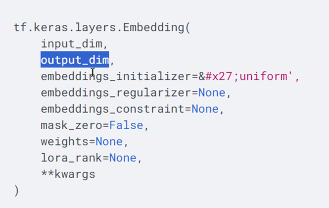

In [85]:
model.add(Embedding(16, 4))

In [86]:
model

<Sequential name=sequential_4, built=False>

In [87]:
# 텍스트를 읽고 긍정, 부정 예측하기

In [112]:
del token

In [113]:
# 텍스트 리뷰 자료를 지정합니다.
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]


In [114]:
import numpy as np

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
classes = np.array([1,1,1,1,1,0,0,0,0,0])

# 토큰화 
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


In [115]:
token.word_counts

OrderedDict([('너무', 1),
             ('재밌네요', 1),
             ('최고예요', 1),
             ('참', 1),
             ('잘', 1),
             ('만든', 1),
             ('영화예요', 1),
             ('추천하고', 1),
             ('싶은', 1),
             ('영화입니다', 1),
             ('한번', 1),
             ('더', 1),
             ('보고싶네요', 1),
             ('글쎄요', 1),
             ('별로예요', 1),
             ('생각보다', 1),
             ('지루하네요', 1),
             ('연기가', 1),
             ('어색해요', 1),
             ('재미없어요', 1)])

In [116]:
x = token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과:\n",  x)


리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [117]:
max([len(i) for i in token.texts_to_sequences(docs)])

4

In [118]:
# pad_sequences(x, 4) 

In [119]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import *
# 패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
padded_x = pad_sequences(x, 4)  
print("\n패딩 결과:\n", padded_x)


패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [120]:
token.word_index

{'너무': 1,
 '재밌네요': 2,
 '최고예요': 3,
 '참': 4,
 '잘': 5,
 '만든': 6,
 '영화예요': 7,
 '추천하고': 8,
 '싶은': 9,
 '영화입니다': 10,
 '한번': 11,
 '더': 12,
 '보고싶네요': 13,
 '글쎄요': 14,
 '별로예요': 15,
 '생각보다': 16,
 '지루하네요': 17,
 '연기가': 18,
 '어색해요': 19,
 '재미없어요': 20}

In [121]:
len(token.word_index) +1

21

In [122]:
# 임베딩에 입력될 단어의 수를 지정합니다.
word_size = len(token.word_index) +1

In [123]:
padded_x

array([[ 0,  0,  1,  2],
       [ 0,  0,  0,  3],
       [ 4,  5,  6,  7],
       [ 0,  8,  9, 10],
       [ 0, 11, 12, 13],
       [ 0,  0,  0, 14],
       [ 0,  0,  0, 15],
       [ 0,  0, 16, 17],
       [ 0,  0, 18, 19],
       [ 0,  0,  0, 20]])

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
del model 

In [125]:
# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
model.add(Embedding(input_dim=word_size, output_dim=8, input_length=4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

c:\anaconda3\envs\nlpdl\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step - accuracy: 0.2000 - loss: 0.7038
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2000 - loss: 0.7014
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4000 - loss: 0.6991
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4000 - loss: 0.6967
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4000 - loss: 0.6944
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 0.6921
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6000 - loss: 0.6898
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7000 - loss: 0.6874
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8000 - loss: 0.6851
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8000 - loss: 0.6828
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8000 - loss: 0.6805
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8000 - loss: 0.6782
